# Exploratory Data Analysis (EDA) 

of the scraped dataset extracted in 1-scraping_data.ipynb

In [1]:
import random
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read CSV
reviews_df = pd.read_csv("data/reviews_2025-01-13.csv", sep=",")

r, c = reviews_df.shape
print(f"The csv data has {r} rows and {c} columns")

The csv data has 486 rows and 25 columns


In [3]:
# Open and read the JSON file
with open('data/reviews_2025-01-13.json', 'r') as file:
    reviews = json.load(file)

### Explore JSON-Data read in as list

In [4]:
print("Type of Json-data: ", type(reviews))
print("Type of the first element: ", type(reviews[0]))
print("No. of elements in list: ", len(reviews))


Type of Json-data:  <class 'list'>
Type of the first element:  <class 'dict'>
No. of elements in list:  486


### Explore CSV-Data

In [5]:
# Add a review_id as the first column
reviews_df['review_id'] = range(1, len(reviews_df) + 1)  # Generate unique IDs starting from 1

# Reorder columns to make `review_id` the first column
reviews_df = reviews_df[['review_id'] + [col for col in reviews_df.columns if col != 'review_id']]

In [6]:
# convert year_of_stay to uniform yyyy format

# Function to convert year format
def convert_year(year):
    """
    convert year_of_stay to uniform yyyy format

    Parameters:
    year (float): input year of format yy or yyyy

    Returns:
    year (float): output year of format yyyy
    """
    if pd.isnull(year):  # Check if the value is NaN
        return year
    elif year < 100:  # If the year is in 'yy' format
        return 2000 + year  # from exploratory analysis its known that all years of format yy are in the 21. century
    else:
        return year  # Already in 'yyyy' format

# Apply the conversion function to the 'year_of_stay' column
reviews_df['year_of_stay'] = reviews_df['year_of_stay'].apply(convert_year)

# Display the Years of Stay
reviews_df['year_of_stay'].unique()

array([2024., 2021., 2023., 2034., 2022., 2020., 2019., 2015., 2003.,
       2018., 2017., 2014., 2016., 1995., 1996.,   nan, 2011., 2012.,
       2010., 1998., 1980., 2013., 2009., 2008., 1966., 2007., 2005.,
       2006., 2002.])

There is a typo in one review where the author put 2034 as their year of stay. From looking at the website it is assumed, that the person meant to say 2024 since the review was from 23.07.2024 and in the text is nothing stated about the stay being years ago (e.g. 2014 or 2004). So this typo is going to be corrected to 2024

In [7]:
# Replace 2034 with 2024 in the 'year_of_stay' column
reviews_df['year_of_stay'] = reviews_df['year_of_stay'].replace(2034, 2024)

# Display the Years of Stay
reviews_df['year_of_stay'].unique()

array([2024., 2021., 2023., 2022., 2020., 2019., 2015., 2003., 2018.,
       2017., 2014., 2016., 1995., 1996.,   nan, 2011., 2012., 2010.,
       1998., 1980., 2013., 2009., 2008., 1966., 2007., 2005., 2006.,
       2002.])

In [8]:
# original array
arr = reviews_df['year_of_stay'].unique()

# Sort the array while ignoring NaN values
sorted_arr = np.sort(arr[~np.isnan(arr)])

print(sorted_arr)

[1966. 1980. 1995. 1996. 1998. 2002. 2003. 2005. 2006. 2007. 2008. 2009.
 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019. 2020. 2021.
 2022. 2023. 2024.]


In [9]:
# Extract comments into a new DataFrame
# Step 1: Initialize an empty list for storing comment data
comments_data = []

# Step 2: Loop through reviews to extract comments
for reviewID, review in enumerate(reviews, start=1):
    for comment in review.get('comments', []):
        comments_data.append({
            'review_id': reviewID,
            'commentator': comment.get('commentator', ''),
            'date_of_comment': comment.get('date_of_comment', ''),
            'comment': comment.get('comment', '')
        })

# Step 3: Create a DataFrame from the extracted comments data
comments_df = pd.DataFrame(comments_data)

# Add comment count and drop comments column that contains dictionary

# Step 1: Count the number of comments for each review_id
comments_count = comments_df['review_id'].value_counts().reset_index()
comments_count.columns = ['review_id', 'no_comments']

# Step 2: Merge counts with the original reviews DataFrame
# Merge the counts with the reviews DataFrame on 'review_id'
reviews_df = reviews_df.merge(comments_count, on='review_id', how='left')

# Step 3: Replace NaN values with 0 for reviews without comments
reviews_df['no_comments'] = reviews_df['no_comments'].fillna(0).astype(int)

# Step 4: Remove the original 'comments' column
reviews_df = reviews_df.drop(columns=['comments'])

# Save DataFrames to a CSV file
reviews_df.to_csv('data/reviews_with_comments_count.csv', index=False)
comments_df.to_csv('data/comment_df.csv', index=False)

In [10]:
# Check data types and non-null counts
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   reviewID                            486 non-null    int64  
 1   datePublished                       486 non-null    object 
 2   ratingValue                         486 non-null    float64
 3   headline                            486 non-null    object 
 4   for_hospital_rating                 486 non-null    bool   
 5   department                          386 non-null    object 
 6   author                              486 non-null    object 
 7   role                                486 non-null    object 
 8   year_of_stay                        485 non-null    float64
 9   recommends_hospital                 407 non-null    object 
 10  overall_satisfaction_stars          486 non-null    int64  
 11  overall_satisfaction                486 non-n

In [11]:
# Check for missing values across columns
reviews_df.isnull().sum()

reviewID                                0
datePublished                           0
ratingValue                             0
headline                                0
for_hospital_rating                     0
department                            100
author                                  0
role                                    0
year_of_stay                            1
recommends_hospital                    79
overall_satisfaction_stars              0
overall_satisfaction                    0
quality_of_advice_stars                 0
quality_of_advice                       0
medic_treatment_stars                   0
medic_treatment                         0
administration_and_processes_stars      0
administration_and_processes            0
equipment_and_design_stars            121
equipment_and_design                  121
pro                                    91
contra                                153
disease                               109
private_insurance                 

In [12]:
pd.options.display.max_colwidth = None # default value is 50, max would be "None"
pd.set_option('display.max_rows', 50) # default value is 10, max would be "None"

example = random.sample(list(reviews_df.equipment_and_design_stars[reviews_df.equipment_and_design_stars.isnull()]), k=1) # look at examples

reviews_df.query('equipment_and_design_stars==@example')

,reviewID,datePublished,ratingValue,headline,for_hospital_rating,department,author,role,year_of_stay,recommends_hospital,...,administration_and_processes_stars,administration_and_processes,equipment_and_design_stars,equipment_and_design,pro,contra,disease,private_insurance,patient_review,no_comments
365,366,2015-01-11,1.0,Ärzte gut -Pflegepersonal schlecht,False,NaN,M.ausN.,Angehöriger,2014.0,False,...,2,weniger zufrieden,NaN,NaN,NaN,NaN,Halswirbelfraktur und Oberschenkelhalsfaktur,False,"Die Ärzte haben grandiose Arbeit geleistet, waren sehr freundlich und kompetent! Die ""Schwestern"" jedoch wirkten gehetzt, genervt, gelangweilt, waren unfreundlich und herzlos zu unserem Angehörigen und sehr kurz angebunden und schnippisch zu uns als Angehörige, auf Fragen unsererseits kamen Antwort die wir uns genauso gut hätten auch selbst geben können, fachlich inkompetent und menschlich sehr kalt! Ein frisch operierter Mann (91Jahre!) In allem Bereichen voll orientiert, wurde behandelt wie ein Demenzkranker im Endstadium, völlig respektlos und unwürdig ! Er hat seine Tabletten in den Mund ""geworfen"" bekommen, verschluckte sich dabei, und die noch sehr junge Schwester stand tatenlos daneben und sagte nur"" gehts?""(im Beisein der Angehörigen) ich betone...er kam gerade aus dem Op!!! Außerdem wurden gegen seinen Willen beide Bettseitenteile hochgestellt, sowie DIE NOTRUFKLINGEL AUßER REICHWEITE GELEGT!!!es steht außer Frage das dies eine absolute Untat ist, die nicht rechtens ist! Schon allein das ist kein gutes Aushängeschild für eine solch versierte Klinik! Außerdem wurde der zu der Zeit, immobile Mann der im Bett lag und nicht aufstehen konnte, von der Tür aus rufend gefragt was er essen möchte, der alte Mann konnte das jedoch nicht verstehen da die Entfernung zu groß war. Anstatt ihn am Bett erneut zu fragen was er essen möchte, wertete sie sein"" wie Bitte"" als ein - ich möchte nichts essen- !Diese und weitere Ereignisse trugen nicht zur Guten Genesung ihres damaligen Patienten bei, im Gegenteil, ein an sich lebensfroher alter Mann wurde in ihrer Klinik derart wie Abschaum behandelt das seine Genesung erst bei verlassen ihrer Klinik in Gang kam. Kurz gesagt bezeichne ich diese Art und Weise mit kranken, hilfs- und pflegebedürftige Menschen umzugehen als eine Art Misshandlung. Einige Schwestern haben in diesem Job nicht ihre Berufung gefunden sondern eine Fehlentscheidung getroffen und sind derart betriebsblind das es verwerflich ist in diesem Job weiter zu arbeiten, sie sind dort definitiv fehl am Platz.",1
366,367,2015-01-05,1.0,Leider garnicht zu empfehlen,False,Entbindung,jungemutti,Patient,2014.0,False,...,0,unzufrieden,NaN,NaN,Leider nichts,Von der Hygiene bis zum Personal alles,Entbindung,False,"Ich bin ohne Blasensprung aber mit Wehen im ­drei Minutenabstand in die Uniklinik gekommen. Dort wurde mir gesagt ich soll so ungefähr zwei Stunden rumlaufen, es wäre noch längst nicht so weit. Falsch, es war so weit. Denn eine halbe Stunde später kamen die Wehen schon im Minutenabstand. Um in den ­Kreißsaal zu kommen, musste ich regelrecht betteln. Frei nach dem Motto der Schwestern dort, ohne Blasensprung auch keine Geburt. Und wieder falsch gedacht. Der Blasensprung erfolgte erst bei der Geburt, als die Presswehen einsetzten. Zu dieser Zeit war ich komplett allein im Kreißsaal. Die Beleghebamme Kamm erst dazu, als ich die Geburt quasi komplett allein gemeistert habe. Damit war die Sache aber leider noch nicht durchgestanden. Ich ­kamm dann auf die Station für Kaiserschnitte.Auf der Wöchnerinnenstation war kein platz mehr. Stillen konnte ich wegen Hohlwarzen nicht, was allerdings die Hebammen dort nicht von dem Versuch abgehalten hat, mir alle 15 Minuten mein Kind neu anlegen zu wollen. Nach meinem Verweis, auf dieses medizinische Problem wurde nur gesagt, so etwas gebe es nicht. Auf meine mehrmaligen Fragen, nach ­einem ­Fläschen für mein Kind bekam ich nur immer wieder die Antwort, ich soll ihn doch einfach anlegen und ansonsten w

In [13]:
# Number of reviews without comment(s)
(reviews_df['no_comments'] == 0).sum()

303

In [14]:
reviews_df["private_insurance"].unique()

array([False, nan, True], dtype=object)

In [15]:
# Count rows where both conditions are True
count = reviews_df[(reviews_df['for_hospital_rating'] == True) & (reviews_df['recommends_hospital'] == True)].shape[0]
print("Number of rows where both conditions are True:", count)

Number of rows where both conditions are True: 101


In [16]:
# Change column date_published to datetime
reviews_df['date_published'] = pd.to_datetime(reviews_df['date_published'])

# Change column rating_value to int
reviews_df['rating_value'] = reviews_df['rating_value'].astype(int)

# Convert the 'year_of_stay' column to integers where it is not None or NaN
reviews_df['year_of_stay'] = reviews_df['year_of_stay'].apply(
    lambda x: int(x) if pd.notna(x) else None
)

# Change column equipment_and_design_stars to int
reviews_df['equipment_and_design_stars'] = reviews_df['equipment_and_design_stars'].apply(
    lambda x: int(x) if pd.notna(x) else None
)


In [17]:
# Check data types again
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   reviewID                            486 non-null    int64         
 1   datePublished                       486 non-null    datetime64[ns]
 2   ratingValue                         486 non-null    int64         
 3   headline                            486 non-null    object        
 4   for_hospital_rating                 486 non-null    bool          
 5   department                          386 non-null    object        
 6   author                              486 non-null    object        
 7   role                                486 non-null    object        
 8   year_of_stay                        485 non-null    float64       
 9   recommends_hospital                 407 non-null    object        
 10  overall_satisfaction_stars

## Analysis of Categorical Columns

#### Ratings Analysis:

In [18]:
# distribution of rating value
reviews_df['rating_value'].value_counts().sort_index()

ratingValue
1    185
2     61
4     42
5    198
Name: count, dtype: int64

In [19]:
# distribution of overall_satisfaction_stars
reviews_df['overall_satisfaction_stars'].value_counts().sort_index()

overall_satisfaction_stars
0    185
2     61
4     42
6    198
Name: count, dtype: int64

This shows that rating_value and overall_satisfaction_stars are showing the same data while rating_value ranges from 1-5 and overall_satisfaction_stars from 0-6, but not all integers are used. 

| rating_value | overall_satisfaction_stars | count |
|----------|----------|----------|
| 1    | 0   | 184   |
| 2    | 2   | 61   |
| 4    | 4   | 42   |
| 5    | 6   | 198   |


After looking at the website and the process to write a review oneself, it turned out that there are only four choices for giving the different ratings in stars
- unzufrieden (engl: dissatisfied)
- weniger zufrieden (engl: less satisfied)
- zufrieden (engl: satisfied)
- sehr zufrieden (engl: very satisfied)

Accordingly, all ratings are matched to 1 - 4 stars for easier presentation and further work. The matching is done as follows:
0 -> 1, 
2 -> 2, 
4 -> 3, 
6 -> 4


In [20]:
# Define the mapping of values to change
value_map = {0: 1, 4: 3, 5: 4, 6: 4}

# Columns to check and potentially map
columns_to_map = [
    'rating_value',
    'overall_satisfaction_stars', 
    'quality_of_advice_stars', 
    'medic_treatment_stars', 
    'administration_and_processes_stars', 
    'equipment_and_design_stars'
]

# Check if any of the columns contain 5 or 6 (original unmapped values)
needs_mapping = reviews_df[columns_to_map].isin([5, 6]).any().any()

if needs_mapping:
    print("Original values (5 or 6) found. Applying mapping...")
    reviews_df[columns_to_map] = reviews_df[columns_to_map].replace(value_map)
else:
    print("No original values (5 or 6) found. Skipping mapping.")

# Save dataset again
reviews_df.to_csv('data/reviews_with_comments_count.csv', index=False)

# Distribution of overall_satisfaction_stars
reviews_df['overall_satisfaction_stars'].value_counts().sort_index()

Original values (5 or 6) found. Applying mapping...


overall_satisfaction_stars
1    185
2     61
3     42
4    198
Name: count, dtype: int64

In [21]:
# distribution of rating value
reviews_df['rating_value'].value_counts().sort_index()

ratingValue
1    185
2     61
3     42
4    198
Name: count, dtype: int64

Now all satisfaction columns have the same represetation from 1 - 4


| rating_value | overall_satisfaction_stars | count |
|----------|----------|----------|
| 1    | 1   | 184   |
| 2    | 2   | 61   |
| 3    | 3   | 42   |
| 4    | 4   | 198   |


#### Department Analysis:

- 22 departments out of 36 that can be selected on website
    - Augen, Chirugie (Gefäß-, Hand-, Kinder-, Neuro-, Plastische Ch., Torax-, Unfall-), Diabetes, Frauen (Entbindung), Gastrologie, Geriatrie, Hals-Nasen-Ohren, Hämatologie, HAut/Geschl-Heilkunde, Innere, Kardiologie, Kindermedizin, Kind/Jugend-Psych., Lungenheilkunde, Mund/Kiefer-Chirugie, Neurologie, Nephrologie, Nuklearmedizin, Onkologie, Orthopädie, Psychatrei, Psychosomatik, Rheuma, Schmerztherapie, Schlafmedizin, Suchttherapie, Strahlentherapie, Urologie
    - english: Ophthalmology, surgery (vascular, hand, pediatric, neuro, plastic, thoracic, trauma), diabetes, women (childbirth), gastrology, geriatrics, ear, nose and throat, hematology, haematology, internal medicine, cardiology, pediatrics, child/adolescent psychiatry, Pulmonary medicine, Oral and maxillofacial surgery, Neurology, Nephrology, Nuclear medicine, Oncology, Orthopaedics, Psychiatry, Psychosomatics, Rheumatism, Pain therapy, Sleep medicine, Addiction therapy, Radiotherapy, Urology
- Chirugie (Surgery) is the umbrella for 7 types of surgery, either Chriugie or one of the types can be selected
- Entbindung (childbirth) belongs to Frauen (Women)

In [22]:
reviews_df['department'].value_counts()

department
Entbindung                69
Orthopädie                63
Chirurgie                 37
Urologie                  31
Frauen                    28
Neurologie                21
Hals-Nasen-Ohren          20
Augen                     15
Psychosomatik             15
Kardiologie               14
Mund/Kiefer-Chirurgie     11
Haut/Geschl-Heilkunde     10
Psychiatrie               10
Gastrologie                9
Hämatologie                7
Thoraxchirurgie + Herz     7
Kindermedizin              6
Onkologie                  4
Rheuma                     3
Kind/Jugend-Psych.         3
Nephrologie                2
Diabetes                   1
Name: count, dtype: int64

#### Insurance Type Analysis:

- private: 44
- public: 404
- not mentioned: 38

In [23]:
reviews_df['private_insurance'].value_counts()

private_insurance
False    404
True      44
Name: count, dtype: int64

## Visualization

#### Rating Distribution:

Create a histogram for all columns with stars to visualize the distribution of ratings

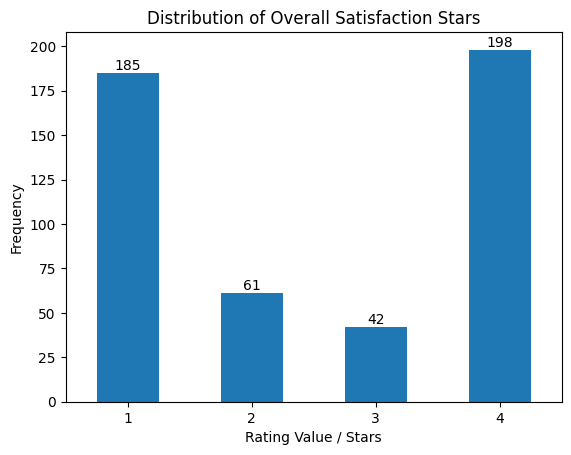

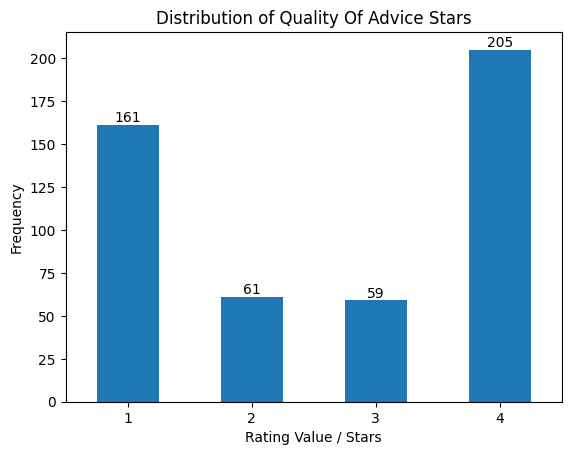

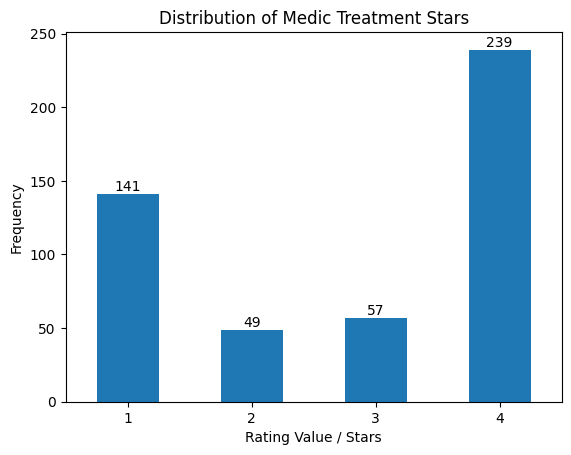

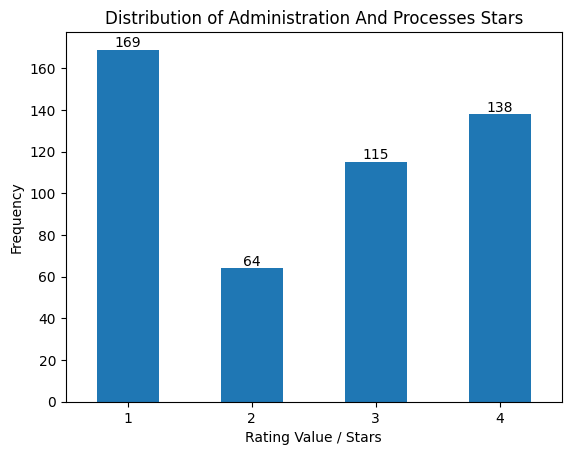

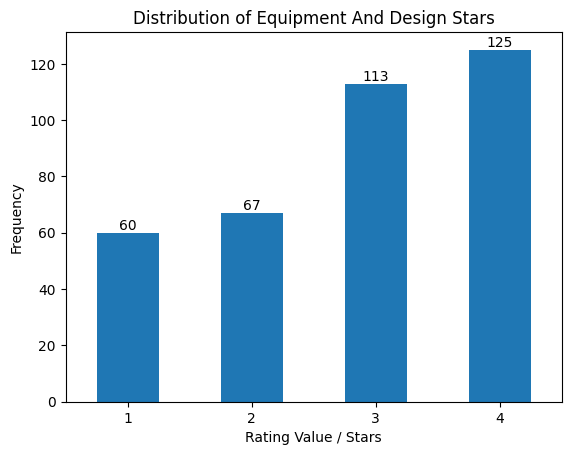

In [24]:
for column in ['overall_satisfaction_stars', 'quality_of_advice_stars', 'medic_treatment_stars', 
               'administration_and_processes_stars', 'equipment_and_design_stars']:
    #Plot the distribution of star ratings for the current column
    bars = reviews_df[column].value_counts().sort_index().plot(kind='bar')
    plt.title(f'Distribution of {column.replace("_", " ").title()}')
    plt.xlabel('Rating Value / Stars')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    # Convert x-axis labels to integers
    plt.gca().set_xticklabels(reviews_df[column].value_counts().sort_index().index.astype(int))
    # Annotate each bar with the count number
    for bar in bars.patches:
        bars.annotate(str(bar.get_height()), 
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                    ha='center', va='bottom', fontsize=10)
    plt.show()

### Recommendation 

thumbs up vs. thumbs down

In [25]:
reviews_df['recommends_hospital'].value_counts()

recommends_hospital
True     220
False    187
Name: count, dtype: int64

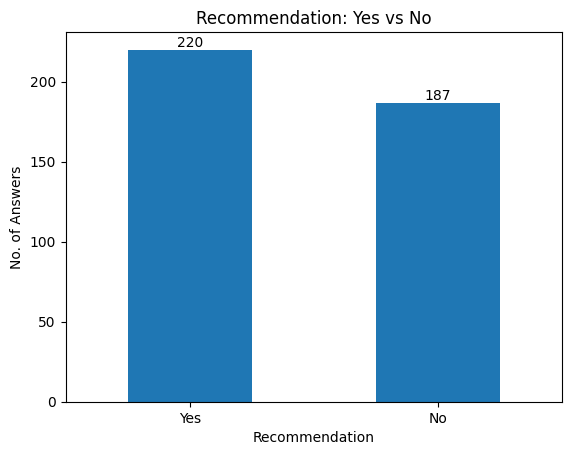

In [26]:
insurance_satisfaction = reviews_df['recommends_hospital'].value_counts()
bars = insurance_satisfaction.plot(kind='bar')
plt.title('Recommendation: Yes vs No')
plt.ylabel('No. of Answers')
plt.xlabel('Recommendation')
plt.xticks([0, 1], ['Yes', 'No'], rotation=0)
# Annotate each bar with the count number
for bar in bars.patches:
    bars.annotate(str(bar.get_height()), 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=10)
plt.show()

#### Satisfaction of different Aspects

1. Department-wise Satisfaction

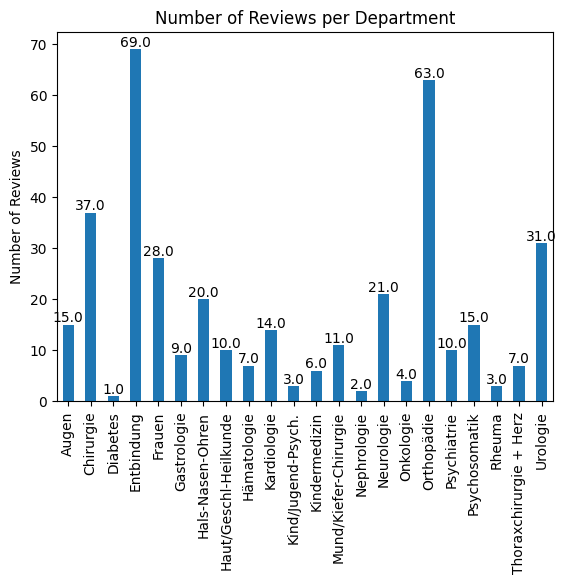

In [27]:
department_satisfaction = reviews_df.groupby('department')['overall_satisfaction_stars'].count()
bars = department_satisfaction.plot(kind='bar')
plt.title('Number of Reviews per Department')
plt.ylabel('Number of Reviews')
plt.xlabel(None)
# Annotate each bar with the count number
for bar in bars.patches:
    bars.annotate(f'{bar.get_height():.1f}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=10)
plt.show()


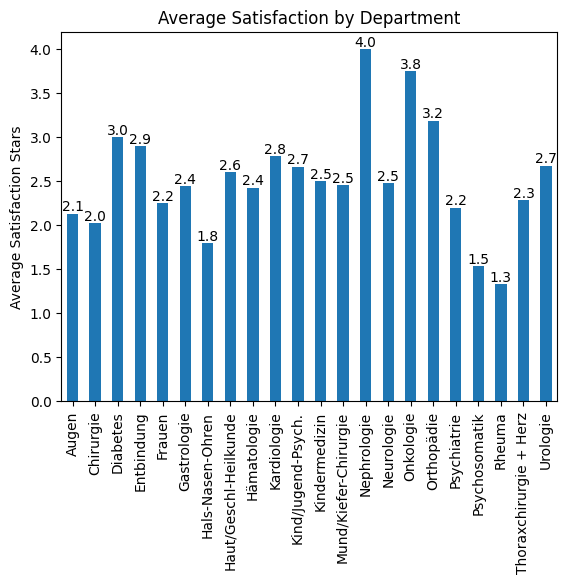

In [28]:
department_satisfaction = reviews_df.groupby('department')['overall_satisfaction_stars'].mean()
bars = department_satisfaction.plot(kind='bar')
plt.title('Average Satisfaction by Department')
plt.ylabel('Average Satisfaction Stars')
plt.xlabel(None)
# Annotate each bar with the count number
for bar in bars.patches:
    bars.annotate(f'{bar.get_height():.1f}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=10)
plt.show()


2. Private vs. Non-private Insurance Satisfaction

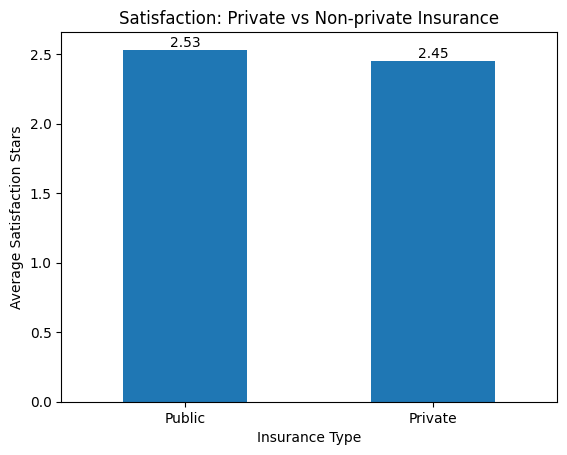

In [29]:
insurance_satisfaction = reviews_df.groupby('private_insurance')['overall_satisfaction_stars'].mean()
bars = insurance_satisfaction.plot(kind='bar')
plt.title('Satisfaction: Private vs Non-private Insurance')
plt.ylabel('Average Satisfaction Stars')
plt.xlabel('Insurance Type')
plt.xticks([0, 1], ['Public', 'Private'], rotation=0)
# Annotate each bar with the count number
for bar in bars.patches:
    bars.annotate(f'{bar.get_height():.2f}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=10)
plt.show()


recommendation per insurance type

<Figure size 800x600 with 0 Axes>

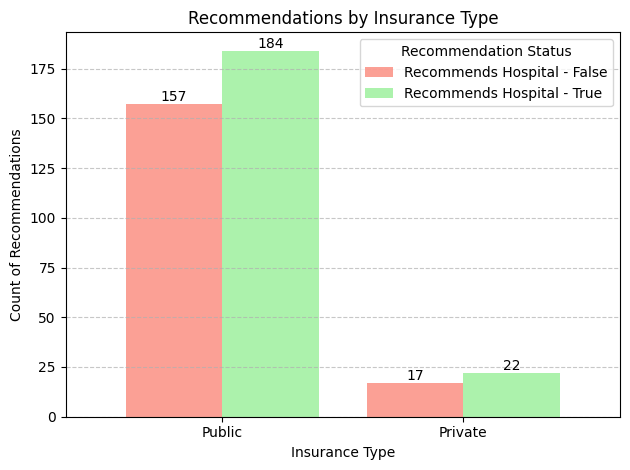

In [30]:
# Calculate the count of recommendations (True/False) per insurance type
recommendation_counts = reviews_df.groupby(['private_insurance', 'recommends_hospital']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(8, 6))
bars = recommendation_counts.plot(kind='bar', color=['salmon', 'lightgreen'], alpha=0.75, width=0.8)
plt.title('Recommendations by Insurance Type')
plt.xlabel('Insurance Type')
plt.ylabel('Count of Recommendations')
plt.xticks([0, 1], ['Public', 'Private'], rotation=0)
plt.legend(['Recommends Hospital - False', 'Recommends Hospital - True'], title='Recommendation Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Annotate each bar with the count
for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=10)

plt.show()


#### Avg review for used and not used reviews

In [31]:
# Calculate average rating grouped by for_hospital_rating
avg_rating = reviews_df.groupby('for_hospital_rating')['rating_value'].mean().reset_index()

# Rename the columns for clarity
avg_rating.columns = ['for_hospital_rating', 'avg_rating']

# number for ratings
print("No. of reviews used: ", reviews_df['for_hospital_rating'].value_counts().get(True, 0))
print("No. of reviews not used: ", reviews_df['for_hospital_rating'].value_counts().get(False, 0))
print("No. of reviews - Total: ", reviews_df["for_hospital_rating"].count())
print()

# Display the results
print(avg_rating)

No. of reviews used:  194
No. of reviews not used:  292
No. of reviews - Total:  486

   for_hospital_rating  avg_rating
0                False    2.458904
1                 True    2.613402


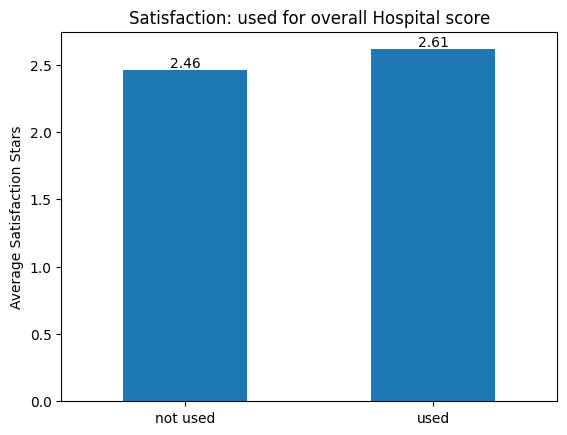

In [32]:
bars = avg_rating.plot(kind='bar')
plt.title('Satisfaction: used for overall Hospital score')
plt.ylabel('Average Satisfaction Stars')
plt.xticks([0, 1], ['not used', 'used'], rotation=0)
plt.legend().set_visible(False)
# Annotate each bar with the count number
for bar in bars.patches:
    bars.annotate(f'{bar.get_height():.2f}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=10)
plt.show()

#### No. of reviews published per year

In [33]:
# original array
arr = reviews_df['date_published'].dt.year.unique()

# Sort the array while ignoring NaN values
sorted_arr = np.sort(arr)

print(sorted_arr)

[2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020 2021 2022 2023 2024]


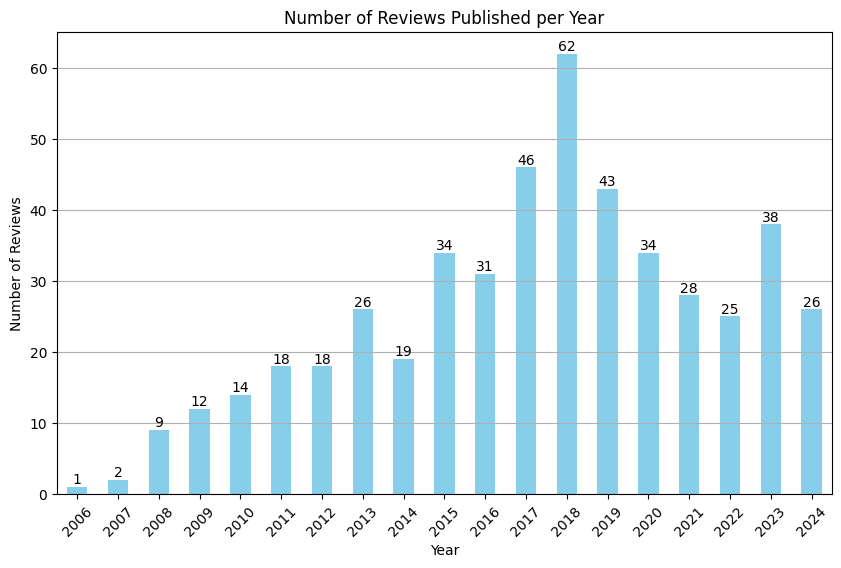

In [34]:
# Extract year and count the number of reviews per year
reviews_per_year =reviews_df['date_published'].dt.year.value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
bars = reviews_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Reviews Published per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(axis='y')
# Annotate each bar with the count number
for bar in bars.patches:
    bars.annotate(str(bar.get_height()), 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=10)
plt.show()

#### Avg rating per year

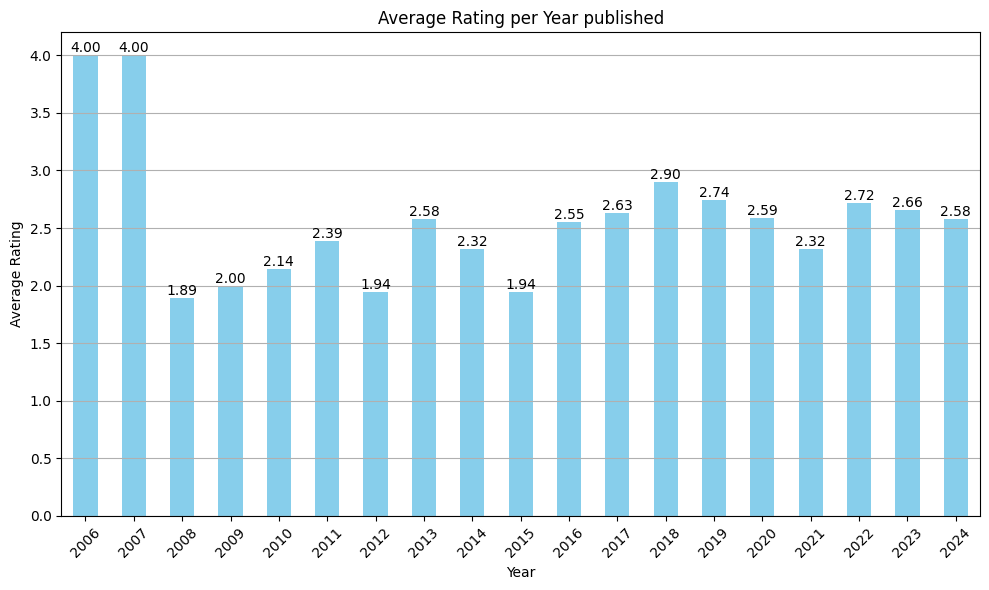

In [35]:
# Calculate the average rating for each year with extracting year from the 'date_published' column
avg_rating_per_year = reviews_df.groupby(reviews_df['date_published'].dt.year)['rating_value'].mean()

# Plot the data
plt.figure(figsize=(10, 6))
bars = avg_rating_per_year.plot(kind='bar', color='skyblue')
plt.title('Average Rating per Year published')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
# Annotate each bar with the count number
for bar in bars.patches:
    bars.annotate(f'{bar.get_height():.2f}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=10)
plt.show()


### Recommendation yes vs. no per Year

Years with recommends_hospital data available: [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


<Figure size 1000x600 with 0 Axes>

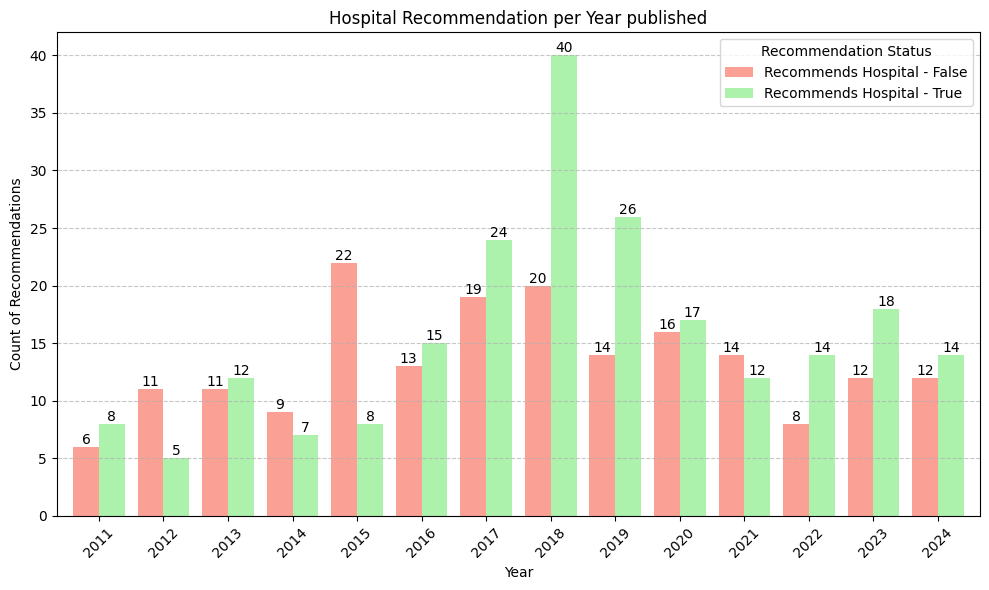

In [36]:
# Extract the year from 'date_published' and filter for rows with a non-null 'recommends_hospital' value
years_with_recommends = reviews_df[reviews_df['recommends_hospital'].notnull()]['date_published'].dt.year.unique()

# Sort and print the years
years_with_recommends = sorted(years_with_recommends)
print("Years with recommends_hospital data available:", years_with_recommends)


# Calculate the count of recommends_hospital per year for True and False
recommends_count_per_year = reviews_df.groupby([reviews_df['date_published'].dt.year, 'recommends_hospital']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10,6))
bars = recommends_count_per_year.plot(kind='bar', color=['salmon', 'lightgreen'], alpha=0.75, width=0.8, figsize=(10, 6))
plt.title('Hospital Recommendation per Year published')
plt.xlabel('Year')
plt.ylabel('Count of Recommendations')
plt.xticks(rotation=45)
plt.legend(['Recommends Hospital - False', 'Recommends Hospital - True'], title='Recommendation Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Annotate each bar with the count
for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=10)

plt.show()

#### No. reviews published per year of stay

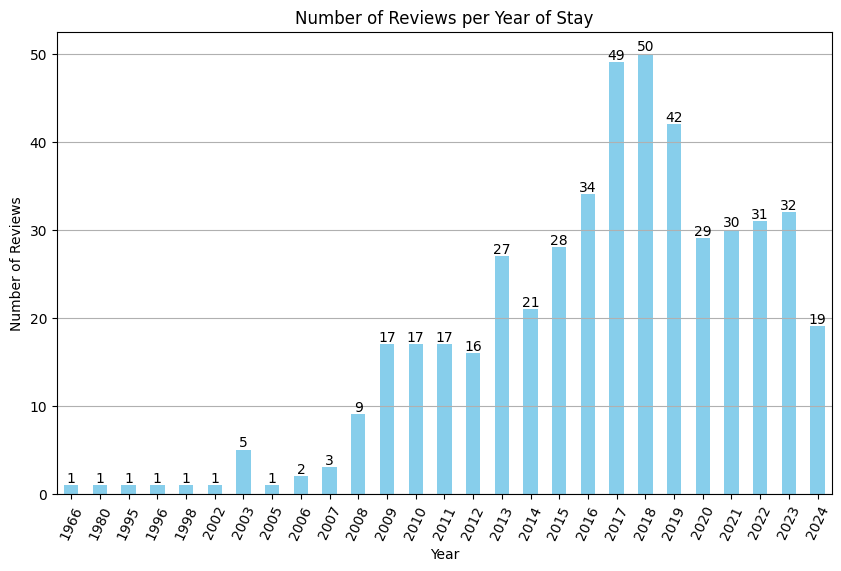

In [37]:
# Extract year and count the number of reviews per year
reviews_per_year_of_stay =reviews_df['year_of_stay'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
bars = reviews_per_year_of_stay.plot(kind='bar', color='skyblue')
plt.title('Number of Reviews per Year of Stay')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=65)
plt.grid(axis='y')
# Convert x-axis labels to integers
plt.gca().set_xticklabels(reviews_per_year_of_stay.index.astype(int))
# Annotate each bar with the count number
for bar in bars.patches:
    bars.annotate(str(bar.get_height()), 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=10)
plt.show()

#### Avg rating per year of stay

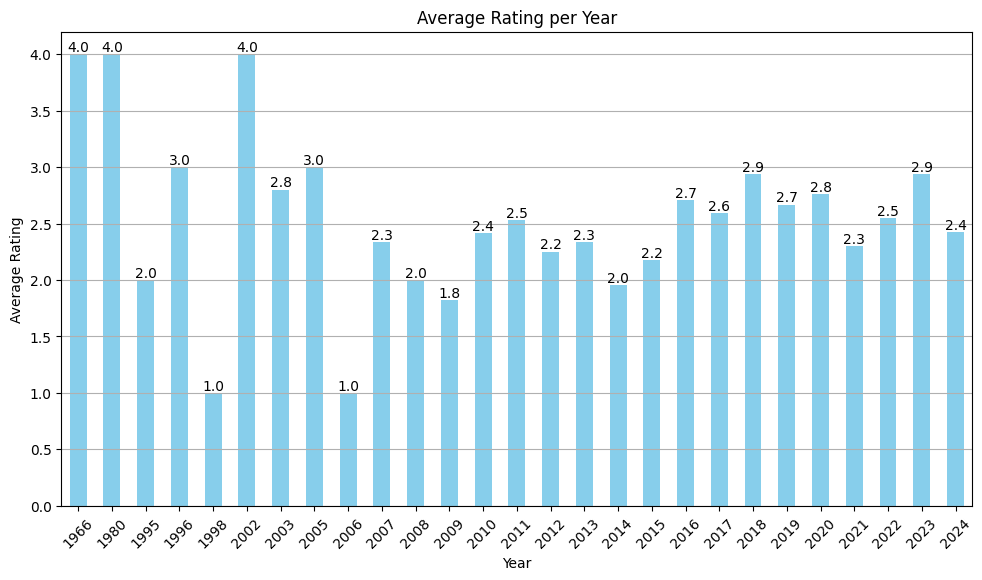

In [38]:
# Calculate the average rating for each year with extracting year from the 'date_published' column
avg_rating_per_year_of_stay = reviews_df.groupby(reviews_df['date_published'])['rating_value'].mean()

# Plot the data
plt.figure(figsize=(10, 6))
bars = avg_rating_per_year_of_stay.plot(kind='bar', color='skyblue')
plt.title('Average Rating per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
# Convert x-axis labels to integers
plt.gca().set_xticklabels(reviews_per_year_of_stay.index.astype(int))
# Annotate each bar with the count number
for bar in bars.patches:
    bars.annotate(f'{bar.get_height():.1f}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=10)
plt.show()


#### Recommendation yes/no per year of stay

Years stayed with recommends_hospital data available: [1966.0, 1980.0, 1995.0, 1996.0, 1998.0, 2003.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, 2023.0, 2024.0, nan]


<Figure size 1000x600 with 0 Axes>

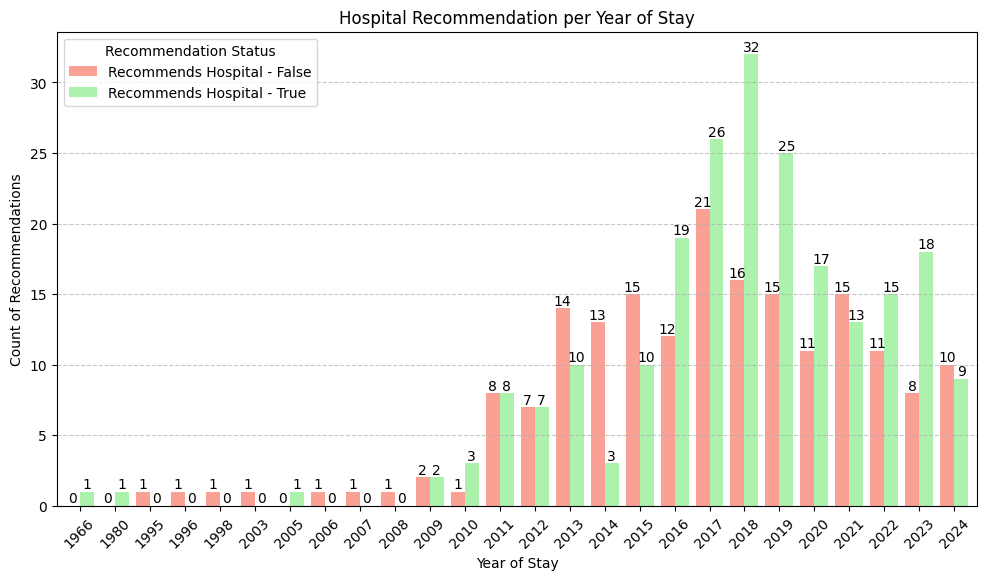

In [39]:
# Extract the year from 'recommends_hospital' and filter for rows with a non-null 'year_of_stay' value
years_with_recommends = reviews_df[reviews_df['recommends_hospital'].notnull()]['year_of_stay'].unique()

# Sort and print the years
years_with_recommends = sorted(years_with_recommends)
print("Years stayed with recommends_hospital data available:", years_with_recommends)


# Calculate the count of recommends_hospital (True/False) per year of stay
recommends_count_per_year_of_stay = reviews_df.groupby(['year_of_stay', 'recommends_hospital']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
bars = recommends_count_per_year_of_stay.plot(kind='bar', color=['salmon', 'lightgreen'], alpha=0.75, width=0.8, figsize=(10, 6))
plt.title('Hospital Recommendation per Year of Stay')
plt.xlabel('Year of Stay')
plt.ylabel('Count of Recommendations')
plt.xticks(rotation=45)
plt.legend(['Recommends Hospital - False', 'Recommends Hospital - True'], title='Recommendation Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Convert x-axis labels to integers
plt.gca().set_xticklabels(recommends_count_per_year_of_stay.index.astype(int))

# Annotate each bar with the count
for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=10)

plt.show()

#### recommenadation for year of stay from 2010 - 2024

<Figure size 1000x600 with 0 Axes>

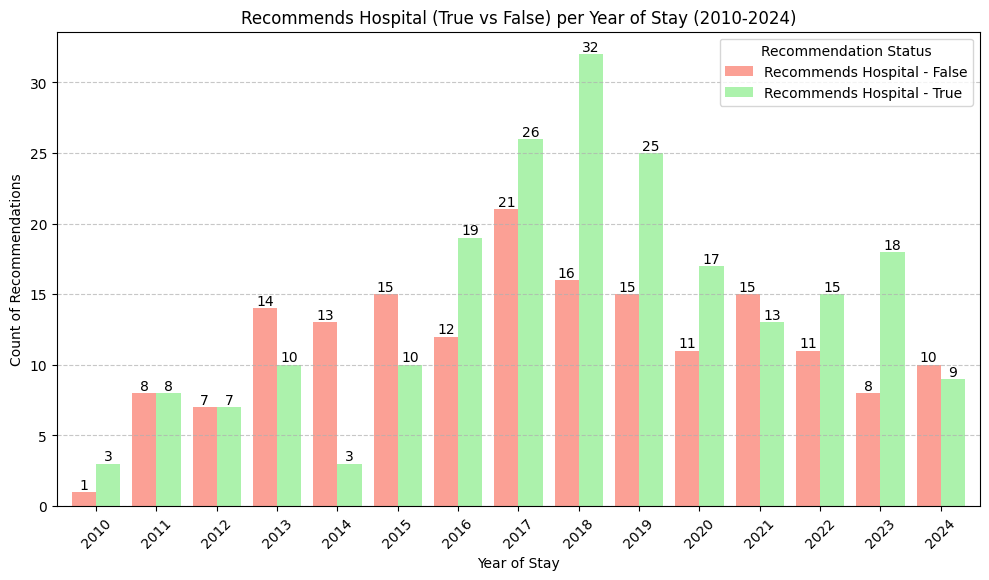

In [40]:
# Filter for year_of_stay between 2010 and 2034
filtered_reviews = reviews_df[(reviews_df['year_of_stay'] >= 2010) & (reviews_df['year_of_stay'] <= 2024)]

# Calculate the count of recommends_hospital (True/False) per year of stay in the filtered data
recommends_count_per_year_of_stay = filtered_reviews.groupby(['year_of_stay', 'recommends_hospital']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
bars = recommends_count_per_year_of_stay.plot(kind='bar', color=['salmon', 'lightgreen'], alpha=0.75, width=0.8, figsize=(10, 6))
plt.title('Recommends Hospital (True vs False) per Year of Stay (2010-2024)')
plt.xlabel('Year of Stay')
plt.ylabel('Count of Recommendations')
plt.xticks(rotation=45)
plt.legend(['Recommends Hospital - False', 'Recommends Hospital - True'], title='Recommendation Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Convert x-axis labels to integers
plt.gca().set_xticklabels(recommends_count_per_year_of_stay.index.astype(int))

# Annotate each bar with the count
for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=10)

plt.show()


#### Did authors write more than one review?

In [41]:
# Count how many reviews each author wrote
author_review_counts = reviews_df['author'].value_counts()

# Identify authors who wrote more than one review
authors_with_multiple_reviews = author_review_counts[author_review_counts > 1]

# Display authors who wrote more than one review
print("No. of authors with more than one review:", authors_with_multiple_reviews.count())
print("\nAuthors who wrote more than one review:")
print(authors_with_multiple_reviews)

No. of authors with more than one review: 21

Authors who wrote more than one review:
author
Renate1971       4
atom1995         3
Sommeraster16    3
konstanze1990    3
Taucher54        3
fredfrohberg     2
DK54             2
woro             2
MamaWilma        2
Fitnesstiger     2
Kumpel04         2
CrazyHorst       2
harrythomas      2
Lisa1706         2
carma            2
losa2310         2
Hakitec2         2
Patient_         2
021280ella       2
020443ggog       2
Lian1111         2
Name: count, dtype: int64


#### Roles of the people that wrote a review

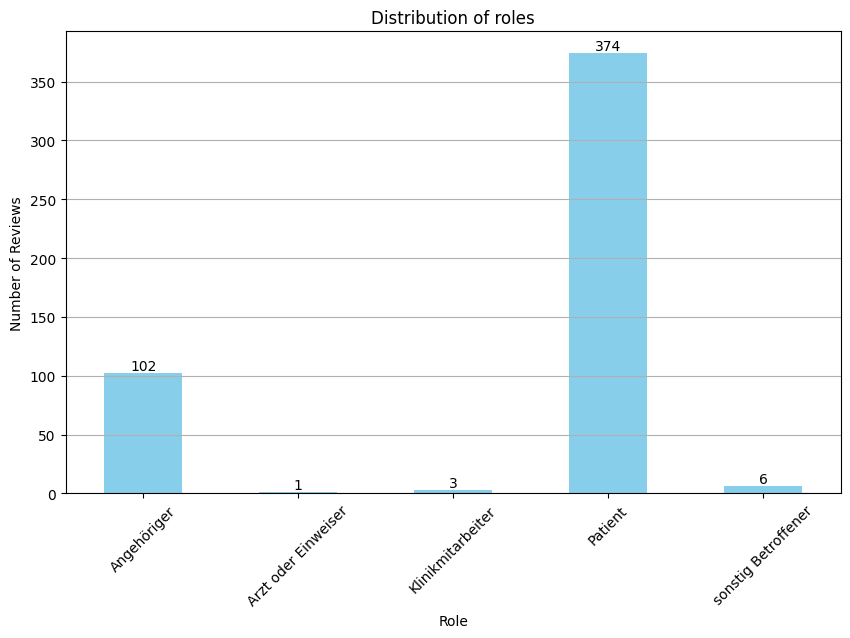

In [42]:
# Extract year and count the number of reviews per year
reviews_per_year_of_stay =reviews_df['role'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
bars = reviews_per_year_of_stay.plot(kind='bar', color='skyblue')
plt.title('Distribution of roles')
plt.xlabel('Role')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(axis='y')
# Annotate each bar with the count number
for bar in bars.patches:
    bars.annotate(str(bar.get_height()), 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=10)
plt.show()

#### No of comments per review

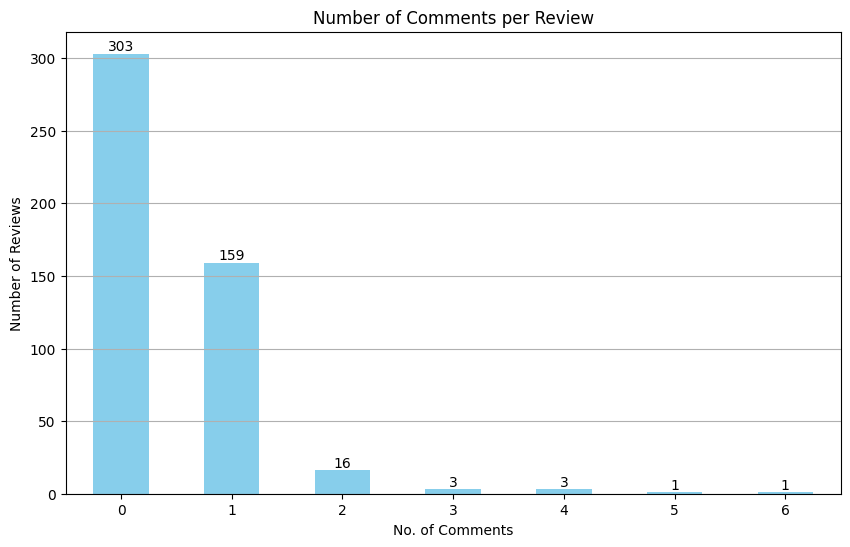

In [43]:
# Extract year and count the number of reviews per year
reviews_per_year_of_stay =reviews_df['no_comments'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
bars = reviews_per_year_of_stay.plot(kind='bar', color='skyblue')
plt.title('Number of Comments per Review')
plt.xlabel('No. of Comments')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Annotate each bar with the count number
for bar in bars.patches:
    bars.annotate(str(bar.get_height()), 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=10)

plt.show()

In [44]:
comment_df = pd.read_csv("data/comment_df.csv", sep=",")

# Count the number of rows with "UKL" in the specified column
count = comment_df[comment_df['commentator'] == 'LBM_UKL'].shape[0]
print("Number of rows with 'LBM_UKL':", count)

# Count how many comments each author wrote
author_comment_counts = comment_df['commentator'].value_counts()

# Identify authors who wrote more than one comment
authors_with_multiple_comments = author_comment_counts[author_comment_counts > 1]

# Display authors who wrote more than one comment
print("No. of authors with more than one comment:", authors_with_multiple_comments.count())
print("\nAuthors who wrote more than one comment:")
print(authors_with_multiple_comments)


Number of rows with 'LBM_UKL': 81
No. of authors with more than one comment: 16

Authors who wrote more than one comment:
commentator
LBM_UKL            81
Bereichsleitung    49
heike50            17
Senta11             4
BorninLeipzig       4
HardcoreMetal       3
Mia2015             3
atom1995            3
CP2021              3
Patient_            2
nobody777           2
chris0815           2
Pathologie          2
havok2              2
michimüller         2
ohne-worte          2
Name: count, dtype: int64
